In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('../data/el_paso_deaths.csv')
df

,Case Number,First Name,Last Name,Case Type,Age,Age Group,Gender,Pronouncement Date,Year,Month,...,Cause A,Type of Incident,Border Enforcement,Nationality,Latitude,Longitude,Accuracy of Location,Pronounced County,Unnamed: 19,Unnamed: 20
0,2008-05232,NaN,NaN,UNM OMI,Unknown,Unknown,Male,10/23/2008,2008.0,October,...,Undetermined ( partially skeletonized remains ),Skeletal,Unknown,NaN,31.813130,-106.587890,10 miles,Doña Ana,NaN,NaN
1,2009-04492,NaN,NaN,UNM OMI,36,36-45,Male,09/03/2009,2009.0,September,...,Undetermined (skeletal remains),Skeletal,Unknown,Mexican,31.806500,-107.672000,GPS,Luna,NaN,DOI 10.17605/OSF.IO/HFA35
2,2009-05188,NaN,NaN,UNM OMI,Unknown,Unknown,Female,10/24/2009,2009.0,October,...,NaN,Skeletal,Unknown,NaN,31.902780,-109.040104,.5 miles,Hidalgo,NaN,NaN
3,2010-01049,NaN,NaN,UNM OMI,Unknown,Unknown,Undetermined,01/01/2010,2010.0,January,...,Undetermined (skeletal remains),Skeletal,Unknown,NaN,32.036820,-107.346930,GPS,Luna,NaN,NaN
4,2011-04405,NaN,NaN,UNM OMI,Unknown,Unknown,Male,08/16/2011,2011.0,August,...,Undetermined (partial skeletal remains),Skeletal,Unknown,NaN,31.515600,-108.270000,GPS,Hidalgo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,20Hudspeth8,NaN,NaN,Hudspeth JP1,Unknown,Unknown,Female,11/27/2020,2020.0,November,...,HYPOTHERMIA,Environmental exposure,Unknown,ECUADOR,30.825810,-104.974710,GPS,Hudspeth,NaN,NaN
595,21Hudspeth1,NaN,NaN,Hudspeth JP1,Unknown,Unknown,Male,02/09/2021,2021.0,February,...,HYPOTHERMIA,Environmental exposure,Unknown,NaN,30.875590,-105.107050,GPS,Hudspeth,NaN,NaN
596,21Hudspeth2,NaN,NaN,Hudspeth JP1,Unknown,Unknown,Male,05/22/2021,2021.0,May,...,HEAT STROKE,Environmental exposure,Unknown,MEXICO,30.902355,-104.916100,GPS,Hudspeth,NaN,NaN
597,21Hudspeth3,NaN,NaN,Hudspeth JP1,Unknown,Unknown,Male,06/17/2021,2021.0,June,...,HEAT STROKE,Environmental exposure,Unknown,Mexico,30.986340,-105.161941,GPS,Hudspeth,NaN,NaN


Check what dtype is each column

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Case Number           599 non-null    object 
 1   First Name            0 non-null      float64
 2   Last Name             0 non-null      float64
 3   Case Type             599 non-null    object 
 4   Age                   599 non-null    object 
 5   Age Group             598 non-null    object 
 6   Gender                599 non-null    object 
 7   Pronouncement Date    599 non-null    object 
 8   Year                  598 non-null    float64
 9   Month                 598 non-null    object 
 10  Post-Mortem Interval  563 non-null    object 
 11  Cause A               490 non-null    object 
 12  Type of Incident      598 non-null    object 
 13  Border Enforcement    598 non-null    object 
 14  Nationality           419 non-null    object 
 15  Latitude              5

Narrow down by the conditions. I want to have to see the frequency of female remains found at the border, so I'm only going to extract 'case number,' 'gender,' and  'Pronouncement Date' 

In [116]:
df_columns = df[['Case Number', 'Gender', 'Pronouncement Date']]

Set to date time so the code is read as a date in the graph

In [117]:
df["Pronouncement Date"] = df["Pronouncement Date"].apply(pd.to_datetime)

In [118]:
df_columns

,Case Number,Gender,Pronouncement Date
0,2008-05232,Male,10/23/2008
1,2009-04492,Male,09/03/2009
2,2009-05188,Female,10/24/2009
3,2010-01049,Undetermined,01/01/2010
4,2011-04405,Male,08/16/2011
...,...,...,...
594,20Hudspeth8,Female,11/27/2020
595,21Hudspeth1,Male,02/09/2021
596,21Hudspeth2,Male,05/22/2021
597,21Hudspeth3,Male,06/17/2021


df_columns["Pronouncement Date"] = pd.to_datetime(df["Pronouncement Date"])

In [119]:
df["Pronouncement Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 599 entries, 0 to 598
Series name: Pronouncement Date
Non-Null Count  Dtype         
--------------  -----         
599 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 KB


Then I filter by query to narrow by female

In [120]:
df_fm = df_columns.query("Gender == 'Female'")
df_fm

,Case Number,Gender,Pronouncement Date
2,2009-05188,Female,10/24/2009
19,2016-03306,Female,06/11/2016
29,2018-04806,Female,08/20/2018
33,2019-00039,Female,01/02/2019
41,2019-05408,Female,09/04/2019
...,...,...,...
568,24-0189,Female,04/05/2024 21:01:00
573,14Hudspeth1,Female,02/21/2014
574,14Hudspeth2,Female,02/21/2014
589,20Hudspeth3,Female,8/23/2020


In [135]:
type(df_fm)

pandas.core.frame.DataFrame

In [136]:
df_fm.to_csv("../output/el_paso_female_deaths.csv")

Set to ascending to have it in chronological order and then reset index by date

In [137]:
df_dates = df_fm.sort_values(by='Pronouncement Date', ascending = True)
df_dates

,Case Number,Gender,Pronouncement Date
33,2019-00039,Female,01/02/2019
261,2024-00637,Female,01/21/2024
263,2024-00731,Female,01/24/2024
52,2021-01151,Female,02/04/2021
53,2021-01523,Female,02/17/2021
...,...,...,...
589,20Hudspeth3,Female,8/23/2020
126,2022-06243,Female,8/28/2022
225,2023-05706,Female,8/7/2023
226,2023-05709,Female,8/7/2023


In [138]:
df_deaths = df_dates.set_index('Pronouncement Date')
df_deaths.head()

,Case Number,Gender
Pronouncement Date,,
01/02/2019,2019-00039,Female
01/21/2024,2024-00637,Female
01/24/2024,2024-00731,Female
02/04/2021,2021-01151,Female
02/17/2021,2021-01523,Female


Then resample according to 'ME' 

In [139]:
df_resample = df_deaths.resample('ME').count()
df_resample.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

Store it in 'female_deaths' and plot it

In [140]:
el_paso_female_deaths = df_resample['Gender']
el_paso_female_deaths

Pronouncement Date
2009-10-31     1
2009-11-30     0
2009-12-31     0
2010-01-31     0
2010-02-28     0
              ..
2024-04-30     3
2024-05-31     2
2024-06-30    21
2024-07-31    12
2024-08-31     9
Freq: ME, Name: Gender, Length: 179, dtype: int64

Text(0, 0.5, 'Remains Found')

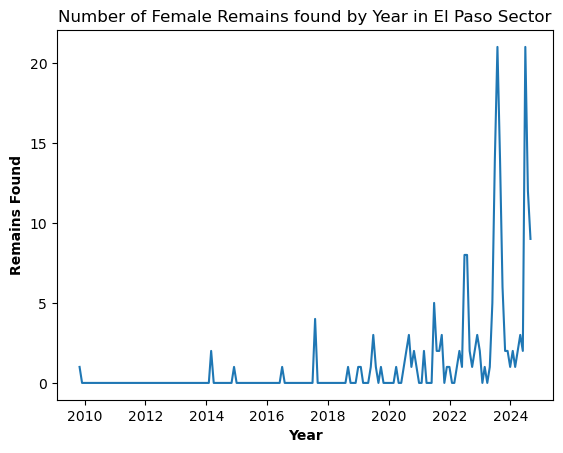

In [141]:
fig, ax = plt.subplots()
ax.plot(el_paso_female_deaths)
plt.title("Number of Female Remains found by Year in El Paso Sector")
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Remains Found', fontweight='bold')

Save graph to output folder

In [142]:
fig.savefig('../output/el_female_deaths.jpg', dpi=100, bbox_inches='tight')
